## HW#2: Visualizing Historical Temperature Changes in Singapore

```{admonition} Objectives
:class: tip

This homework will provide you a real-world example in terms of:
* how to visualize the GEV distribution
* how to visualize time series of temperature anomalies and the trend
* how to make beautiful, accessible, and understandable data visualizations

Happy coding!
```

```{admonition} Submission Guide

Deadline: **Sunday 11:59 pm, 13th November 2022** 
(Note: Late submissions will not be accepted). 

Please upload your solutions to LumiNUS in a Jupyter Notebook format with the name "Homework2_StudentID.ipynb". Make sure to write down your student ID and full name in the cell below. 

For any questions, feel free to contact Prof. Xiaogang HE ([hexg@nus.edu.sg](mailto:hexg@nus.edu.sg)), Haoling CHEN ([h.chen@u.nus.edu](mailto:h.chen@u.nus.edu)) or Meilian LI ([limeilian@u.nus.edu](mailto:limeilian@u.nus.edu)).

```

In [1]:
### Fill your student ID and full name below.

# Student ID:
# Full name:

**Data**:
You will need to use the historical (1982-2020) daily mean air temperature data measured at Singapore's Changi station for this homework. 
You can create a DataFrame using Pandas by reading the file "../../assets/data/Changi_daily_temperature.csv".

### Task 1: Visualize the GEV distribution (30 marks)
To visualize the GEV distribution, you can:
1. Fit Generalized Extreme Value (GEV) distribution of annual maximum daily temperature. Estimate the GEV parameters using Maximum Likelihood method.
2. Plot the PDF curve to directly represent the distribution.
3. Calculate the return level of the 10-year event, and mark it on the figure.
4. Fill the figure with different colors regarding the calculated return level as the dividing line.
5. Make sure that you have included necessary non-data elements, such as title, x/y axis labels, legend, etc. Try to design by yourself. (you can check the `Matplotlib` [tutorial](https://xiaoganghe.github.io/python-climate-visuals/chapters/data-visuals/matplotlib-basic.html#line-plots) for details).

In [2]:
# Your solutions go here.
# Use the + icon in the toolbar to add a cell.

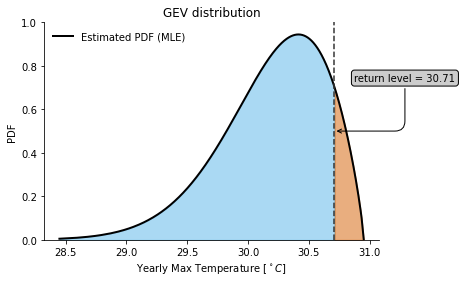

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev

# load and resample data
daytem = pd.read_csv('./assets/data/Changi_daily_temperature.csv', 
                     index_col=0, header=0, parse_dates=True)
ymaxtem = daytem.resample('Y').max()
ymaxtem.index = ymaxtem.index.year
ymaxtem.index.name = "Year"
ymaxtem.columns = ["Yearly Max Temperature"]

# GEV using Maximum likelihood estimation(MLE)
shp_MLE, loc_MLE, sca_MLE = gev.fit(ymaxtem)
MLEGEV = gev(shp_MLE, loc=loc_MLE, scale=sca_MLE)

# plot estimated PDF
bins = MLEGEV.ppf(np.linspace(0.001,1,1000))
print()

fig, ax = plt.subplots()
ax.plot(bins, MLEGEV.pdf(bins),
         color='k', lw=2, label='Estimated PDF (MLE)')
ax.set_xlabel("Yearly Max Temperature [$^\circ C$]")
ax.set_ylabel('PDF')
ax.set_ylim([0, 1])
ax.set_title('GEV distribution')
ax.legend(frameon=False, loc='upper left')
ax.spines[['top', 'right']].set_visible(False)

# calculate return level of 10-year event and mark it on the figure
return_period = 10
prob = 1-1/return_period
return_level = MLEGEV.ppf(prob)
plt.axvline(return_level, color='0.2', linestyle='dashed')
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=90,rad=10")
plt.annotate('return level = %.2f' % (return_level),
            (return_level, 0.5), xytext=(20, 50), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

# color to distingusih
return_level_id = np.size(bins[bins<=return_level])
color = ['#56B4E9', '#D55E00']
ax.fill_between(bins[:return_level_id], np.zeros((return_level_id,)), MLEGEV.pdf(bins[:return_level_id]),
                 color=color[0], alpha=0.5)
ax.fill_between(bins[return_level_id:], np.zeros((1000-return_level_id,)), MLEGEV.pdf(bins[return_level_id:]), 
                 color=color[1], alpha=0.5)

plt.show()

### Task 2: Visualize the trend of temperature anomaly ( 70 marks )
**Q1: Visualize the time series and trend of historical temperature anomalies of Singapore (35 marks)**
- Calculate the annual mean temperature from the daily data. This will result in a data set of 39 values — one per year. (5 marks)
- Calculate the annual temperature anomalies using the first 10-year period as the baseline. To do this, you need to:  
(1) calculate the decadal mean temperature over the first 10 years (1982—1991)  
(2) subtract the decadal mean for each year. (5 marks)
- Make a line graph of these annual temperature anomalies and make sure that you have included necessary non-data elements. (10 marks)
- Based on the annual temperature anomalies above, visualize the trend using a 5-year moving window. (15 marks)

In [2]:
# Your solutions go here.
# Use the + icon in the toolbar to add a cell.

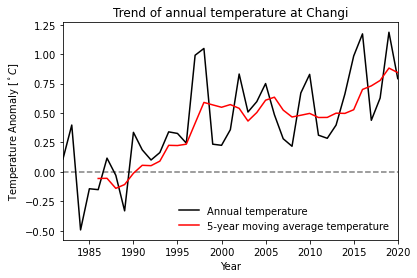

In [14]:
# calculate the annual mean temperature
yrtem = daytem.resample('Y').mean()
yrtem.index = yrtem.index.year
yrtem.index.name = "Year"
yrtem.columns = ["Yearly Mean Temperature"]

# calculate the annual temperature anomalies
tembase = np.mean(yrtem.loc[1982: 1991], axis=0)
temanom = yrtem - tembase

# plot the time series of annual temperature
plt.plot(temanom, linestyle ='solid', color='k', label='Annual temperature')
plt.plot(temanom.index, np.zeros(temanom.index.shape), '--k', alpha=0.5)
plt.xlim(temanom.index.min(), temanom.index.max())
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly [$^\circ C$]")
plt.title("Trend of annual temperature at Changi")

# calculate and plot the 5-year moving average temperature
temanom5 = temanom.rolling(5).mean()
temanom5 = temanom5.dropna()
plt.plot(temanom5, linestyle='solid', color='r', label='5-year moving average temperature')

plt.legend(frameon=False, loc='best')
plt.show()

**Q2: Add climate stripes for Singapore (35 marks)**

- Reproduce the [climate stripes](https://showyourstripes.info/s/asia/singapore) for Singapore using `Matplotlib`. (20 marks)
- Use your generated climate stripes as the background and then overlay the time series and the trend of annual anomalies (from Q1) on top of the climate stripes. (15 marks)

Tips:  
- You can refer to [this GitHub repository](https://github.com/josephshea/ClimateStripes/blob/master/ClimateStripes-Canada.ipynb) to make the climate stripes.  
- To make a pretty and accessible (colorblind safe) chart, you might want to fine tune the aesthetics (e.g., color palette of the diverging colorbar) of your chart. 

In [6]:
# Your solutions go here.
# Use the + icon in the toolbar to add a cell.

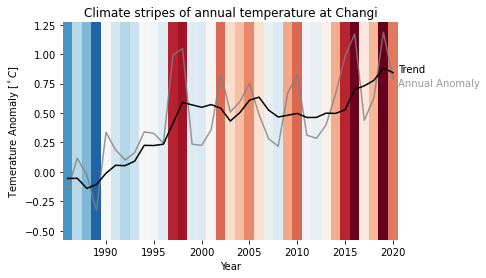

In [11]:
# set figure properties
fig, ax = plt.subplots(frameon=False)
ax.spines[:].set_visible(False)

# plot annual climate stripes
mplnor = mpl.colors.Normalize(vmin=np.nanmin(temanom),
                              vmax=np.nanmax(temanom))
for i in range(temanom.size):
    plt.axvline(temanom.index[i],
                color=plt.cm.RdBu_r(mplnor(temanom.iloc[i, 0])),
                linewidth=10)  # Linewidth should be manually set

# plot line graph
ax.plot(temanom, linestyle='solid', color=[0.5, 0.5, 0.5], alpha=0.8)
ax.annotate('Annual Anomaly', (temanom.index[-1] + 0.5, temanom.iloc[-1, 0]),
            color=[0.5, 0.5, 0.5], alpha=0.8, verticalalignment='top')
ax.plot(temanom5, linestyle='solid', color='k')
ax.annotate("Trend", (temanom5.index[-1] + 0.5, temanom5.iloc[-1, 0]), color='k')
ax.set_xlim(temanom5.index.min() - 0.5, temanom5.index.max() + 0.5)
ax.set_xlabel("Year")
ax.set_ylabel("Temerature Anomaly [$^\circ C$]")
ax.set_title("Climate stripes of annual temperature at Changi")

plt.show()